<a href="https://colab.research.google.com/github/jaidarydev/jaidarydev/blob/main/Guia_visualizacion_datos_astronomicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LECTURA DEL HEADER DE IMAGENES ASTRONOMICAS

In [ ]:
from google.colab import drive
from astropy.io import fits

# Rutas locales de las imágenes FITS
calibration_image_paths = ['/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/bias01202024164210001.fit',
                           '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Flat_R-1s_01202024193232001.fit',
                           '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Darks_120s_R_01202024165041001.fit']
astronomical_image_path = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/1130_R_120s_01212024020627001.fit'

# Lectura del encabezado de cada imagen
for path in calibration_image_paths:
    with fits.open(path) as hdul:
        header = hdul[0].header
    print(f"Header de la imagen de calibración: {header.get('OBJECT')}")
    print(header)
    print("\n" + "-"*50 + "\n")
    print(f"Telescopio empleado: {header.get('TELESCOP', 'No disponible')}")
    print(f"Fecha de observación: {header.get('DATE-OBS', 'No disponible')}")
    print(f"Tiempo de exposición: {header.get('EXPTIME', 'No disponible')} segundos")
    print(f"Tamaño del Detector CCD: {header.get('DETSIZE ', 'No disponible')}")
    print(f"Tamaño de las imágenes: {header.get('BITPIX', 'No disponible')} números de bits por píxel")
    print(f"Equinoccio: {header.get('EQUINOX', 'No disponible')}")
    print(f"Filtro: {header.get('FILTER', 'No disponible')}")
    print(f"RA del centro de la imágen: {header.get('OBJCTRA', 'No disponible')}")
    print(f"DEC del centro de la imágen: {header.get('OBJCTDEC', 'No disponible')}")
    print("\n" + "-"*50 + "\n")
    print('\n')

with fits.open(astronomical_image_path) as hdul:
    header = hdul[0].header
print(f"Header de la imagen astronómica: {header.get('OBJECT')}")
print(header)
print("\n" + "-"*50 + "\n")
print(f"Telescopio empleado: {header.get('TELESCOP', 'No disponible')}")
print(f"Fecha de observación: {header.get('DATE-OBS', 'No disponible')}")
print(f"Tiempo de exposición: {header.get('EXPTIME', 'No disponible')} segundos")
print(f"Tamaño del Detector CCD: {header.get('DETSIZE ', 'No disponible')}")
print(f"Tamaño de las imágenes: {header.get('BITPIX', 'No disponible')} números de bits por píxel")
print(f"Equinoccio: {header.get('EQUINOX', 'No disponible')}")
print(f"Filtro: {header.get('FILTER', 'No disponible')}")
print(f"RA del centro de la imágen: {header.get('OBJCTRA', 'No disponible')}")
print(f"DEC del centro de la imágen: {header.get('OBJCTDEC', 'No disponible')}")
print("\n" + "-"*50 + "\n")


Header de la imagen de calibración: bias
SIMPLE  =                    T / Archivo standard FITS.                         BITPIX  =                   16 / Numero de bits por dato (pixel).               NAXIS   =                    2 / Numero de ejes de la imagen.                   NAXIS1  =                 2149 / Numero de datos en el eje 1 <pix>              NAXIS2  =                 2149 / Numero de datos en el eje 2 <pix>              EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATEOBS = '01-20-2024'         / Fecha de la observacion <yyyy-dd-mm>           LTOBS   = '16:42: 5.063'       / Hora Local de la observacion <hh:mm:ss>        LSTOBS  = '23h 54m 10.25s '    / T. Sideral de la observacion <hh:mm:ss>        COMMENT1= 'FITS (Flexible Image Transport System)' / format defined in Astronom

#2. VISUALIZACION DE LA IMAGENES ASTRONOMICAS

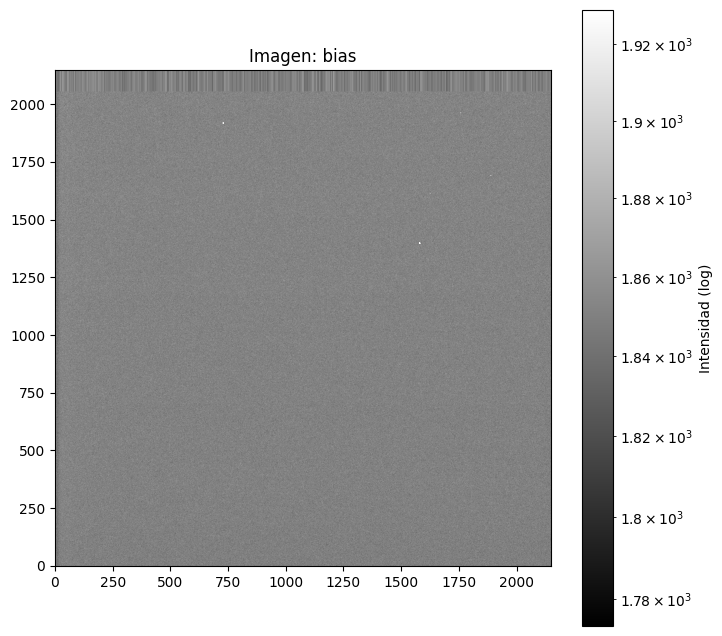

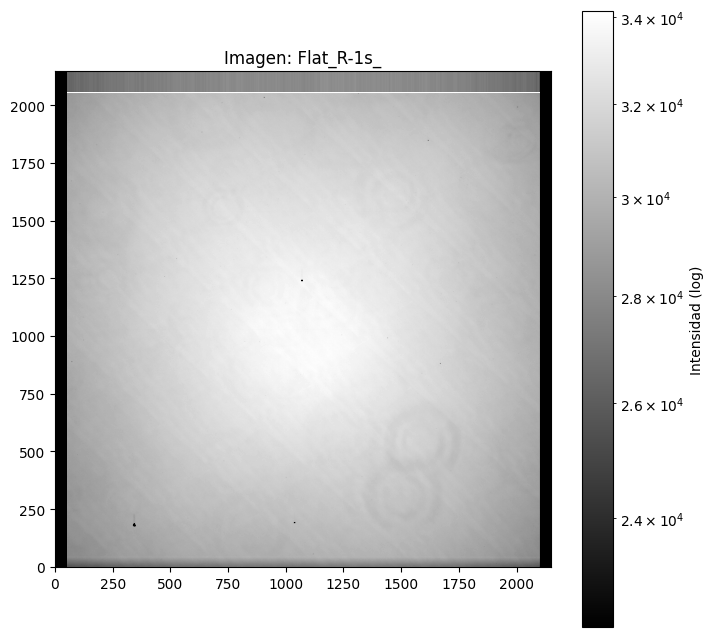

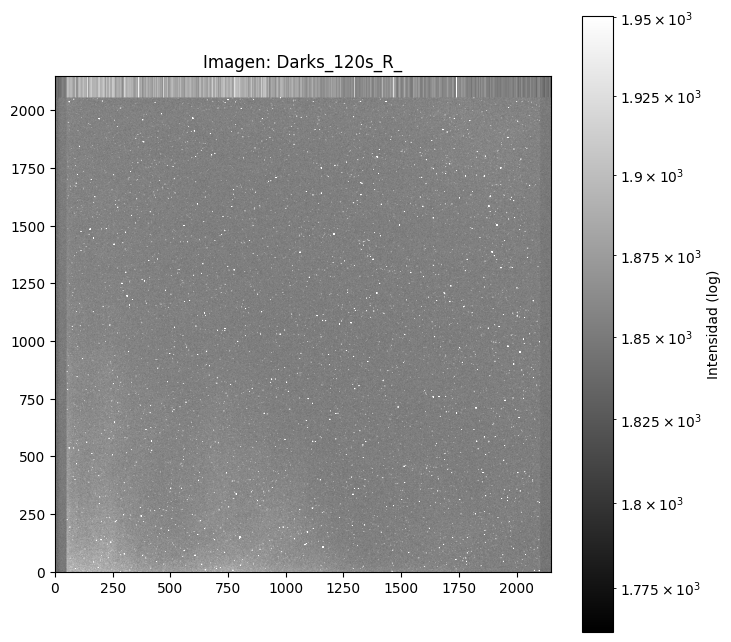

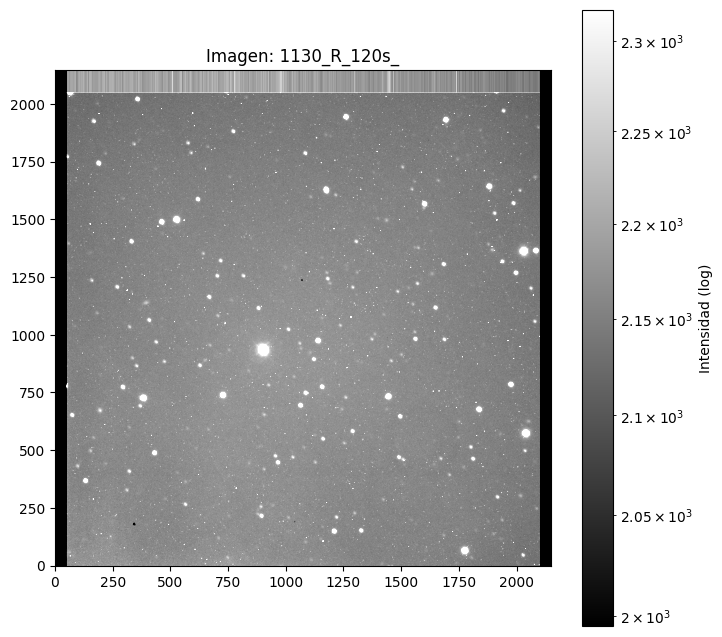

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from matplotlib.colors import LogNorm
from google.colab import drive

# Rutas de las imágenes de calibración y la imagen astronómica
calibration_image_paths = ['/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/bias01202024164210001.fit',
                           '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Flat_R-1s_01202024193232001.fit',
                           '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Darks_120s_R_01202024165041001.fit']


astronomical_image_path = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/1130_R_120s_01212024020627001.fit'


# Función para procesar y mostrar una imagen FITS
def mostrar_imagen(path):
    with fits.open(path) as hdul:
        data = hdul[0].data
        header = hdul[0].header


        # Configura la escala logarítmica ZScale
        zscale = ZScaleInterval()
        zmin, zmax = zscale.get_limits(data)

        # Visualización con escala logarítmica
        plt.figure(figsize=(8, 8))
        plt.imshow(data, cmap='gray', norm=LogNorm(vmin=zmin, vmax=zmax), origin='lower')
        plt.colorbar(label='Intensidad (log)')
        plt.title(f"Imagen: {header.get('OBJECT')}")
        plt.show()

for path in calibration_image_paths:
    mostrar_imagen(path)

# Muestra la imagen astronómica
mostrar_imagen(astronomical_image_path)

#3. MOSTRAR EL VALOR DE DOS PIXELES DIFERENTES

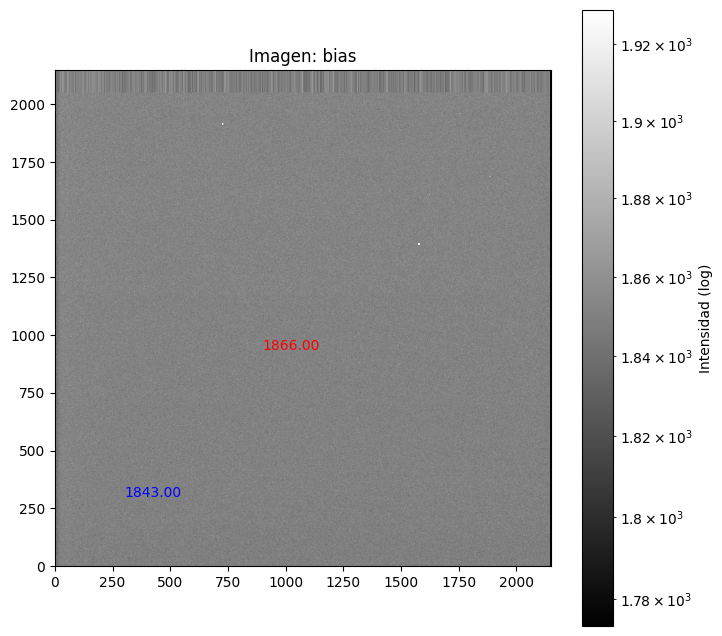

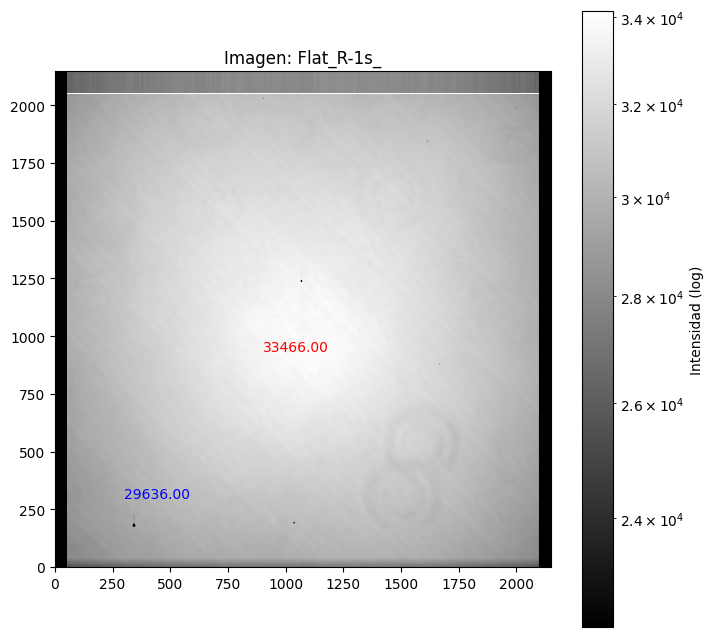

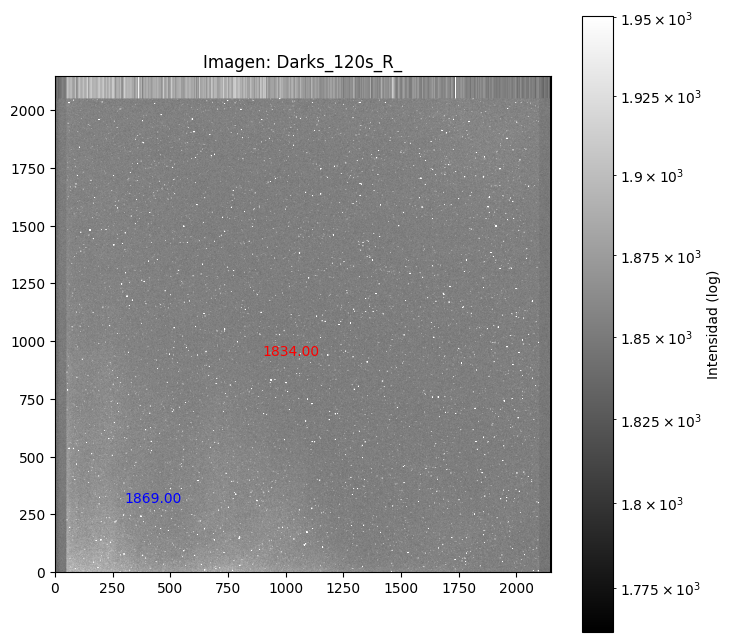

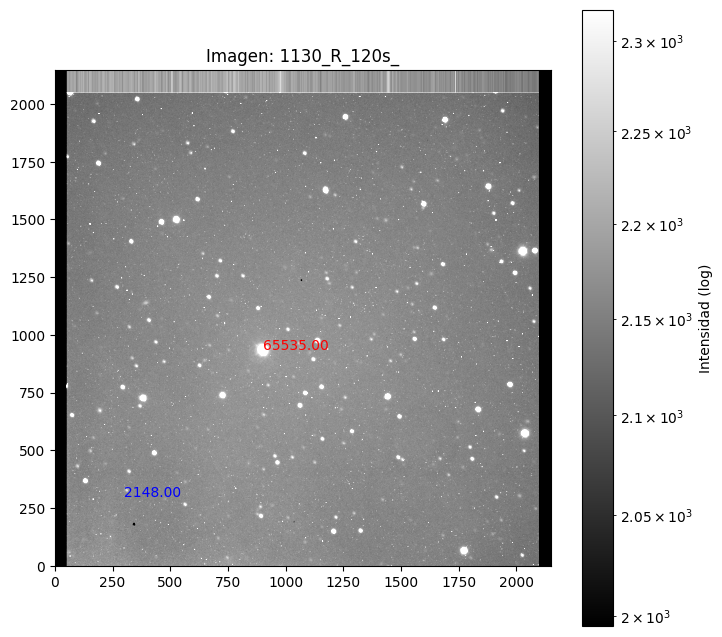

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from matplotlib.colors import LogNorm
from google.colab import drive

# Rutas de las imágenes de calibración y la imagen astronómica
calibration_image_paths = ['/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/bias01202024164210001.fit',
                           '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Flat_R-1s_01202024193232001.fit',
                           '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Darks_120s_R_01202024165041001.fit']


astronomical_image_path = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/1130_R_120s_01212024020627001.fit'

# Coordenadas de los píxeles para mostrar el valor (x, y)
pixel1 = (901, 936)  # Píxel 1
pixel2 = (300, 300)  # Píxel 2

# Función para procesar y mostrar una imagen FITS
def mostrar_imagen(path):
    with fits.open(path) as hdul:
        data = hdul[0].data
        header = hdul[0].header

        # Configura la escala logarítmica ZScale
        zscale = ZScaleInterval()
        zmin, zmax = zscale.get_limits(data)

        # Visualización con escala logarítmica
        plt.figure(figsize=(8, 8))
        plt.imshow(data, cmap='gray', norm=LogNorm(vmin=zmin, vmax=zmax), origin='lower')
        plt.colorbar(label='Intensidad (log)')

        # Muestra los valores de los píxeles
        valor_pixel1 = data[pixel1[1], pixel1[0]]  # Coordenadas invertidas (y, x)
        valor_pixel2 = data[pixel2[1], pixel2[0]]  # Coordenadas invertidas (y, x)
        plt.text(pixel1[0], pixel1[1], f"{valor_pixel1:.2f}", color='red')  # Muestra el valor del píxel 1
        plt.text(pixel2[0], pixel2[1], f"{valor_pixel2:.2f}", color='blue')  # Muestra el valor del píxel 2

        # Ajusta los límites del eje
        plt.xlim(0, data.shape[1])
        plt.ylim(0, data.shape[0])
        plt.title(f"Imagen: {header.get('OBJECT')}")
        plt.show()

# Muestra las imágenes de calibración
for path in calibration_image_paths:
    mostrar_imagen(path)

# Muestra la imagen astronómica
mostrar_imagen(astronomical_image_path)

# 4. PERFIL DE INTENSIDAD DE LOS PIXELES EVALUADOS ANTERIORMENTE

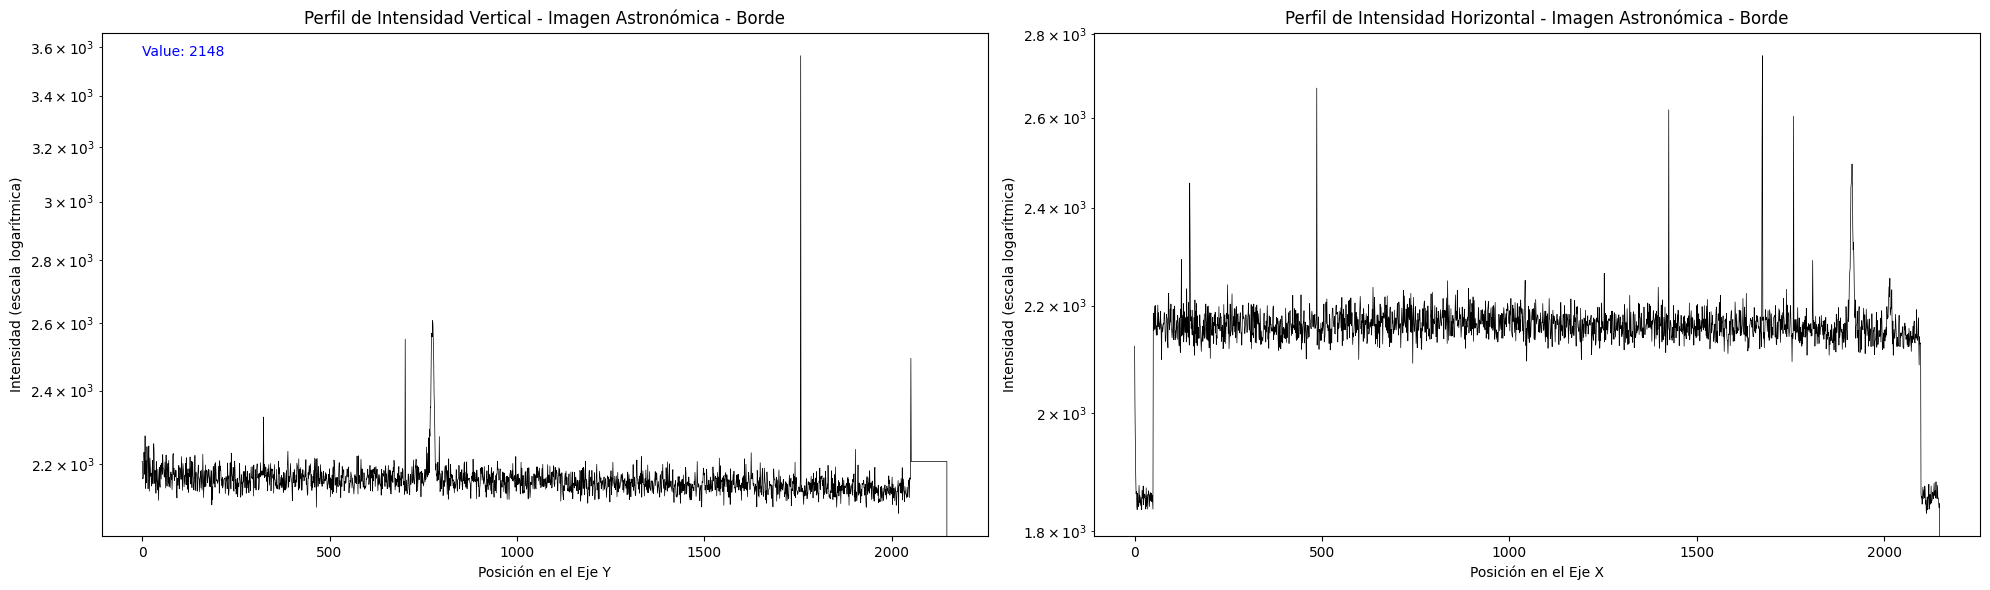

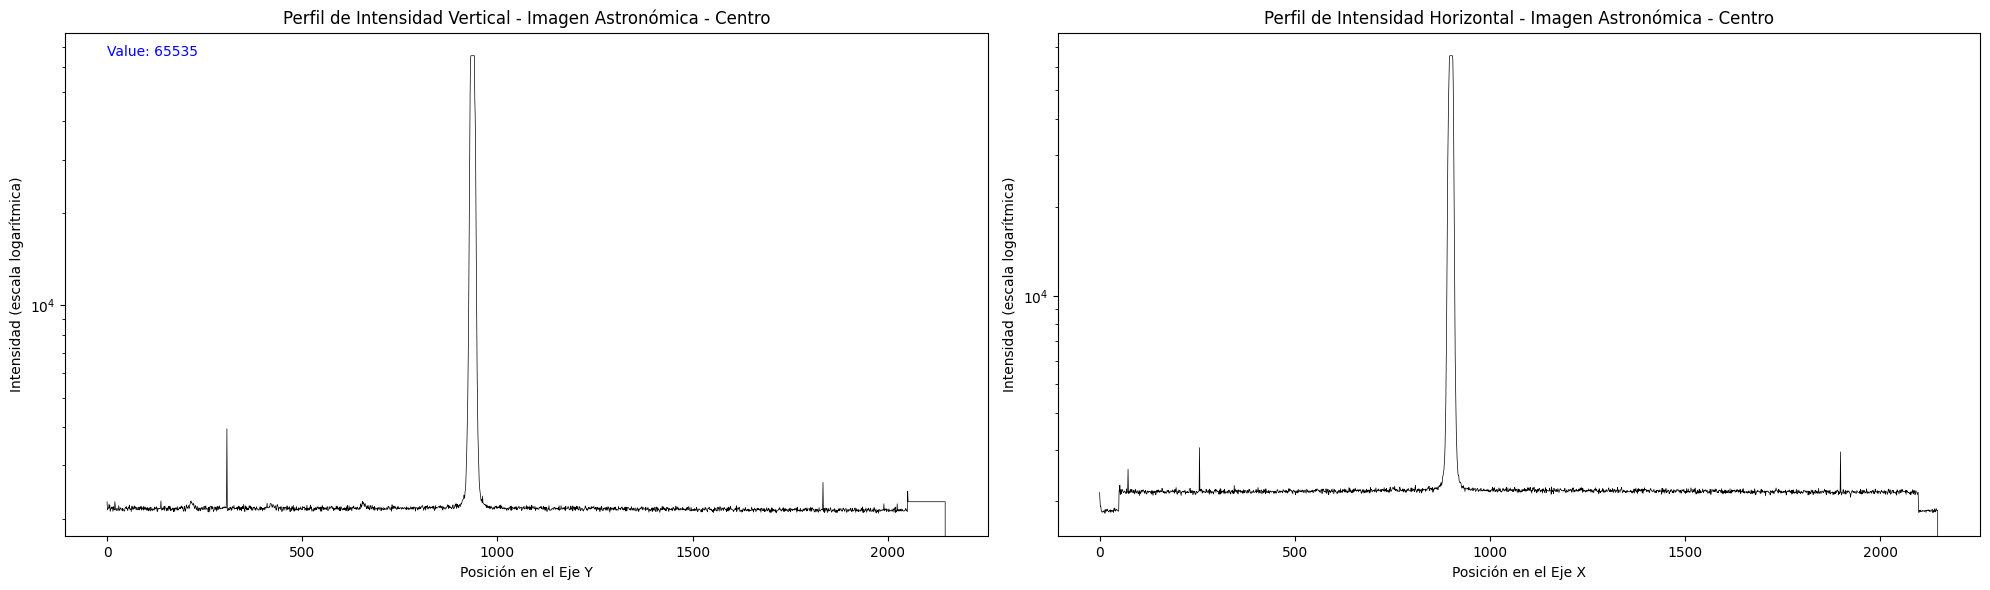

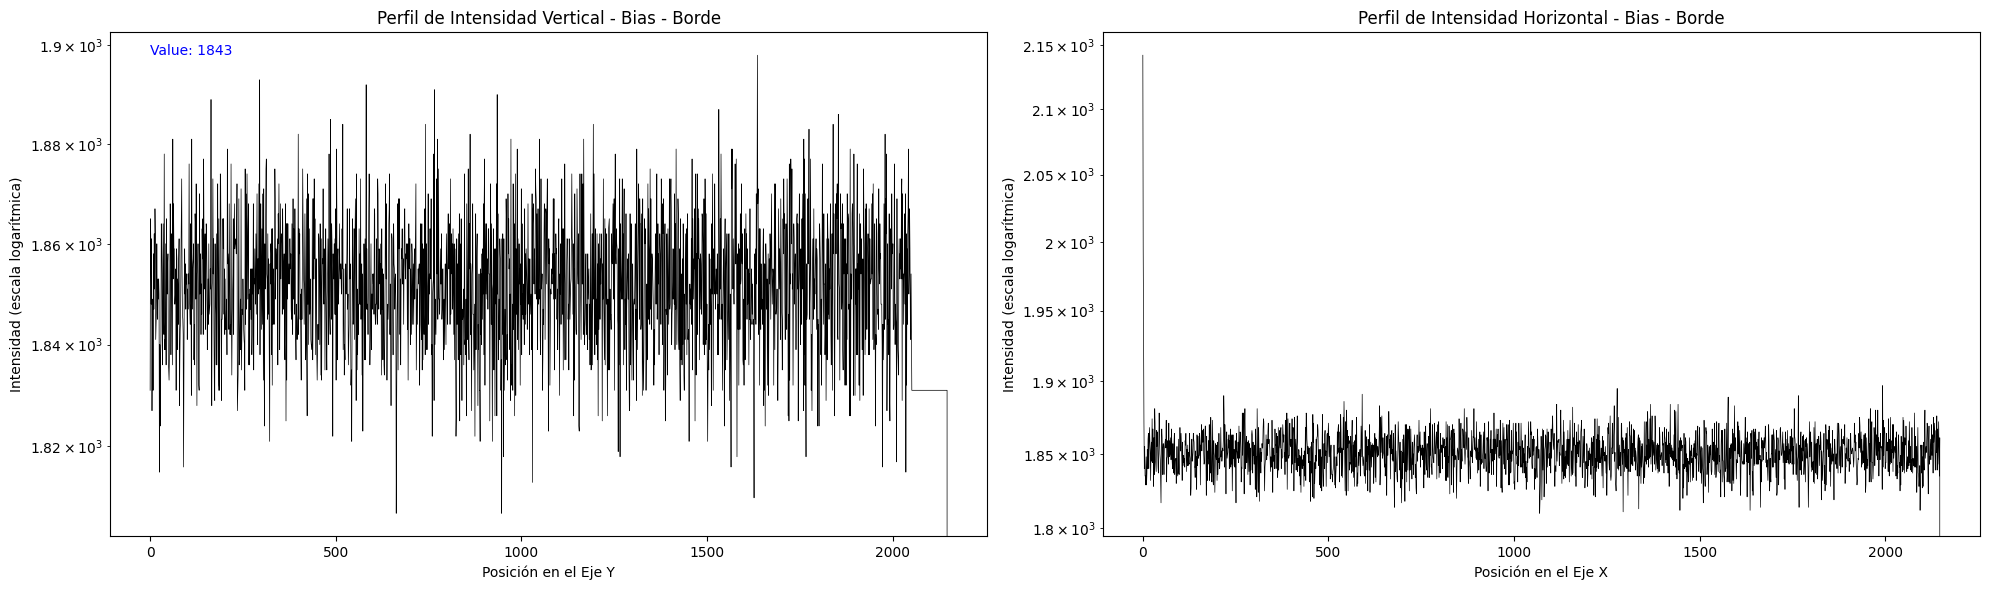

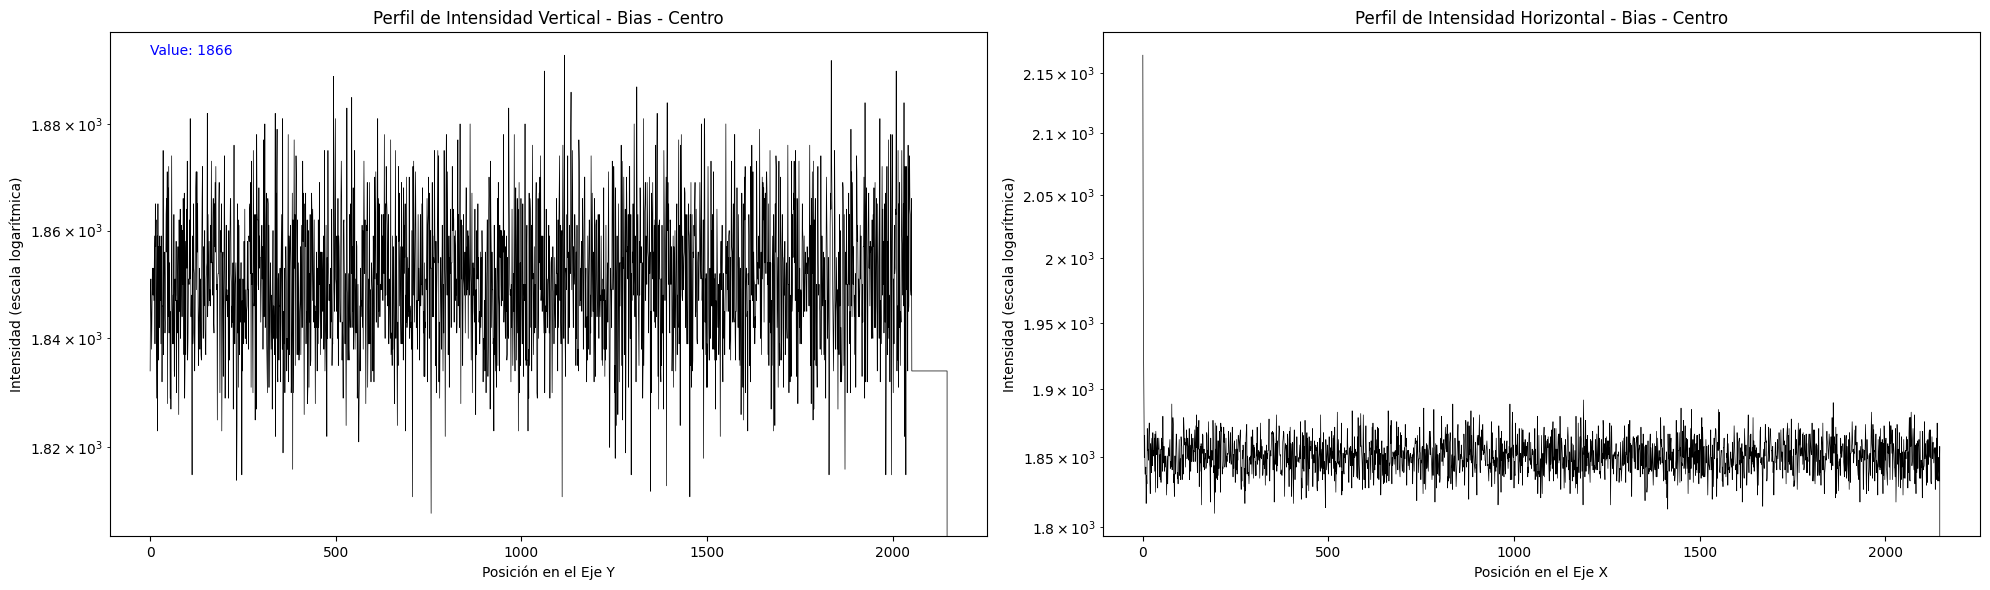

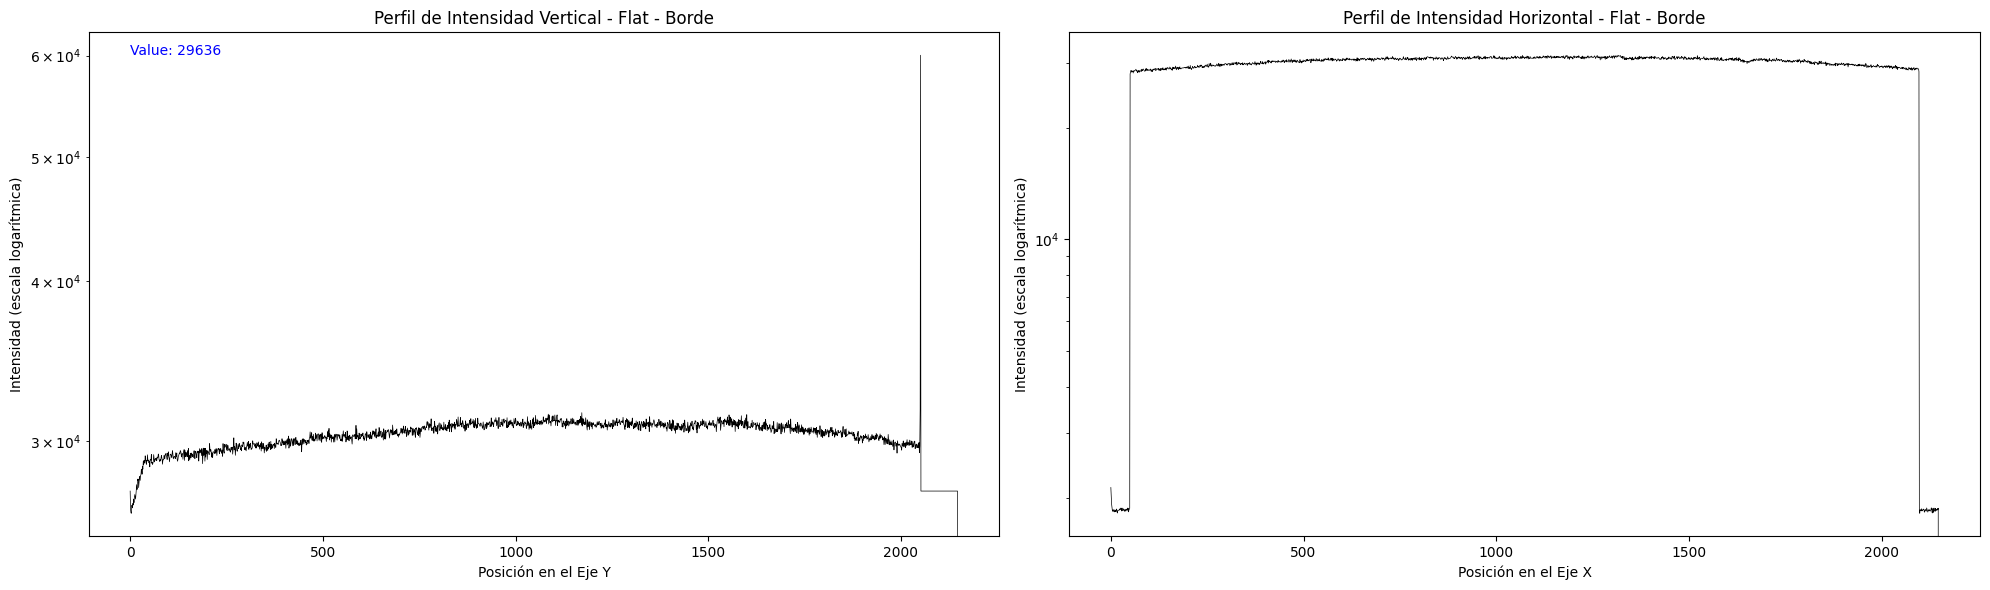

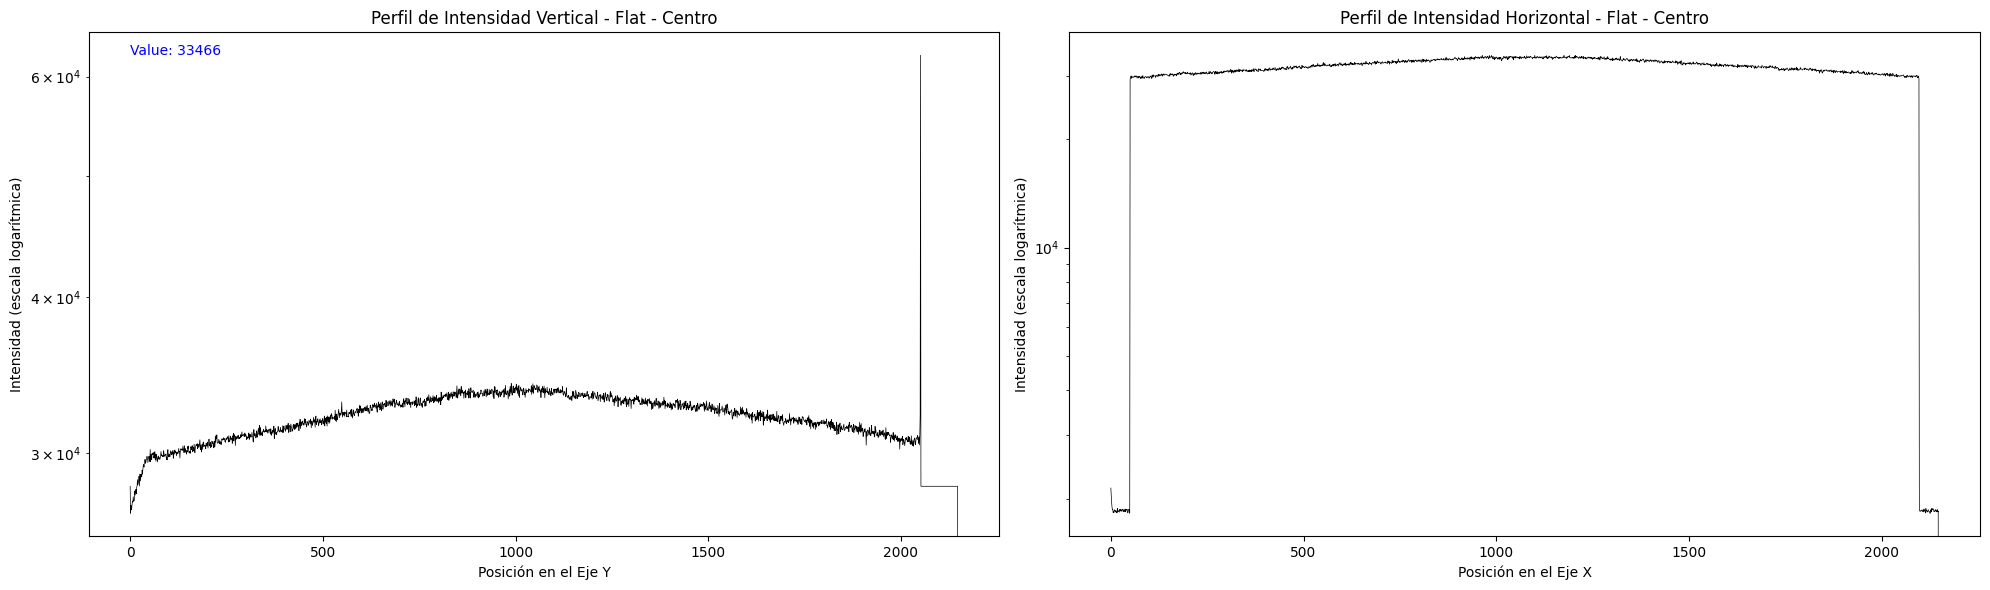

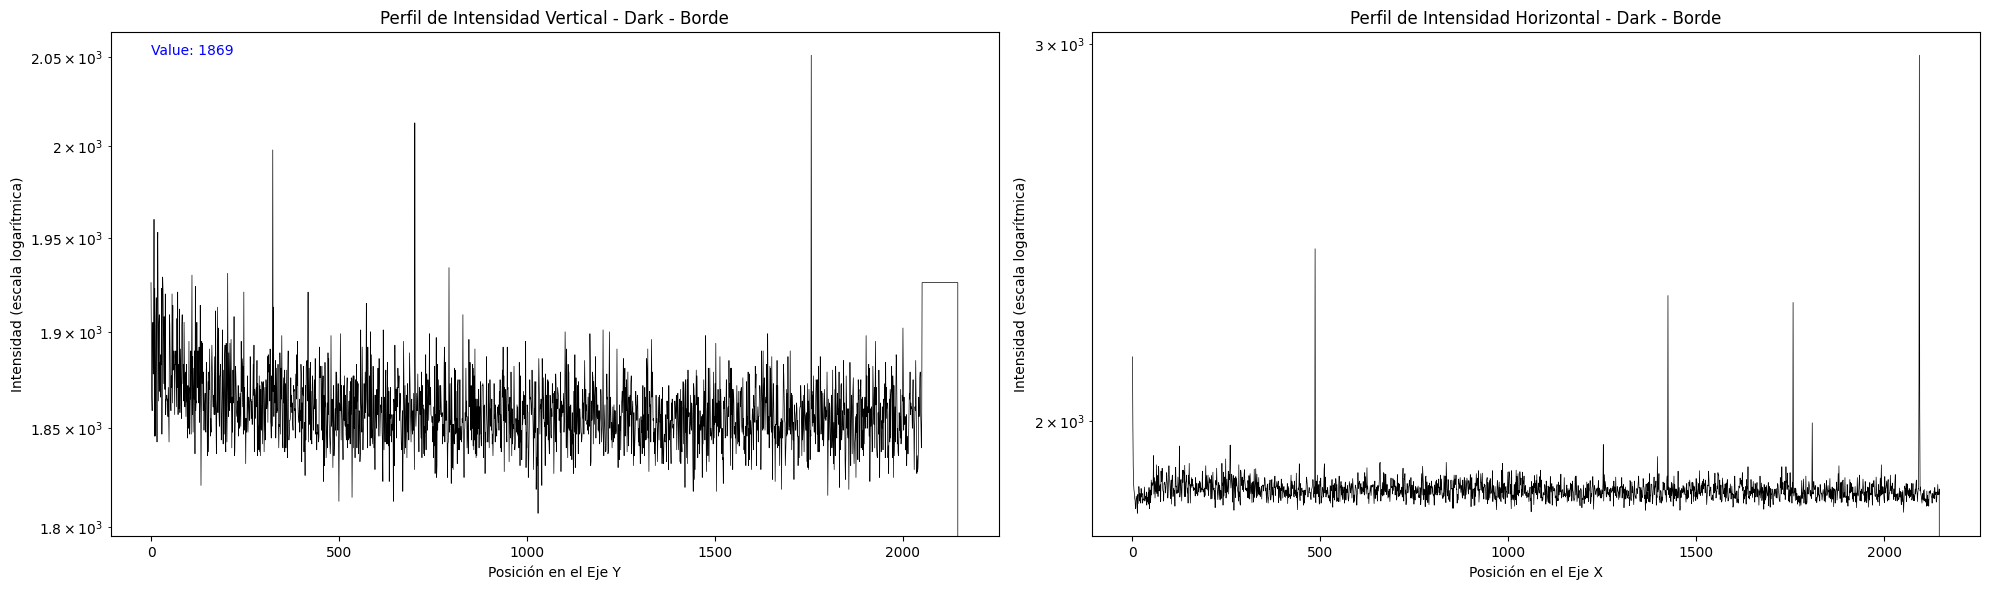

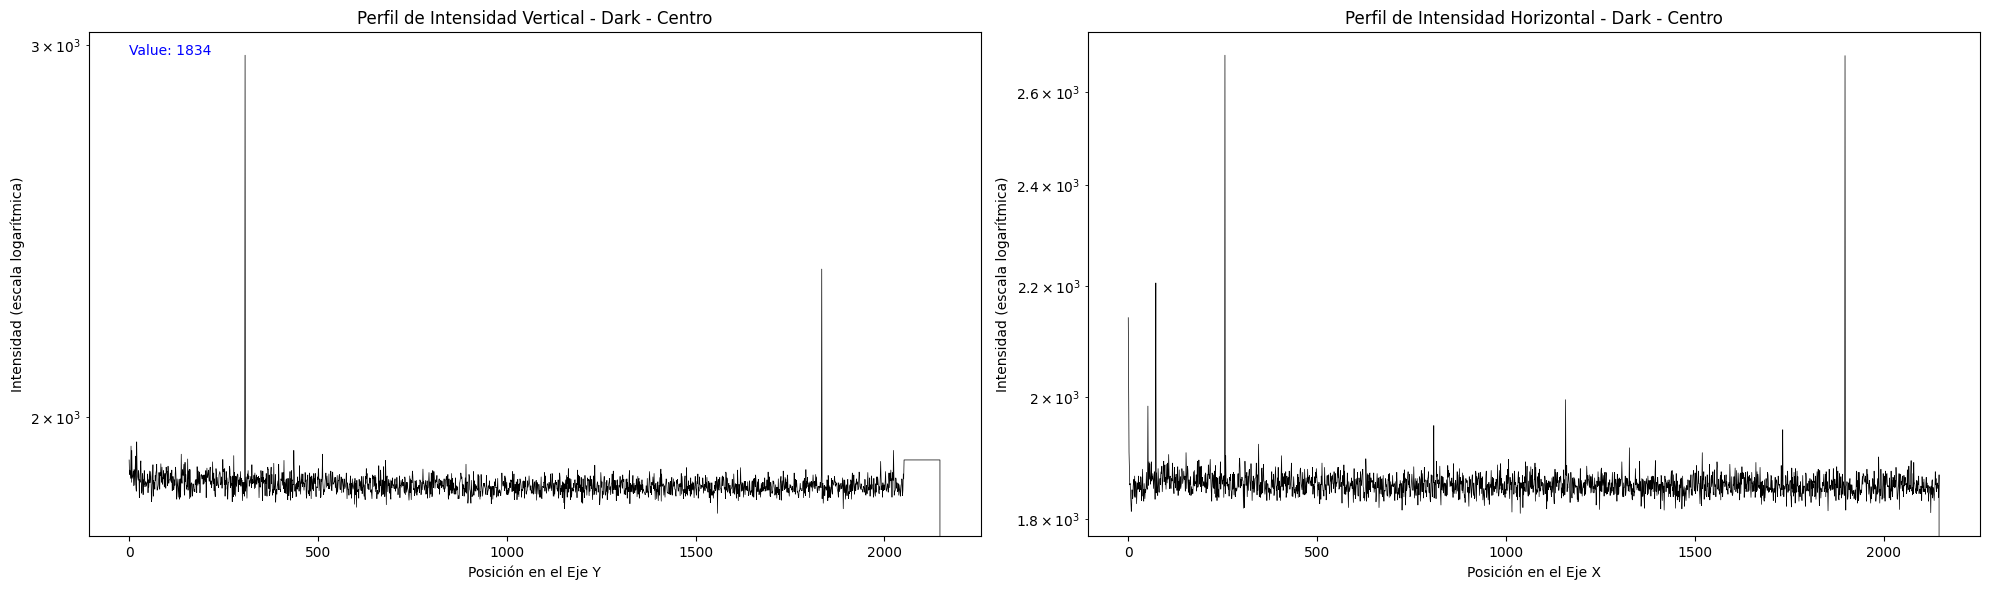

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from google.colab import drive

# Rutas de las imágenes FITS
calibration_image_paths = [
    ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/bias01202024164210001.fit', 'Bias'),
    ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Flat_R-1s_01202024193232001.fit', 'Flat'),
    ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Darks_120s_R_01202024165041001.fit', 'Dark')
]
astronomical_image_path = ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/1130_R_120s_01212024020627001.fit', 'Imagen Astronómica')

# Función para calcular el perfil de intensidad en un píxel
def calcular_perfil_intensidad(imagen, x, y):
    with fits.open(imagen) as hdul:
        data = hdul[0].data
        intensidad = data[y, x]  # Coordenadas invertidas (y, x)
        perfil_vertical = data[:, x]  # Perfil vertical
        perfil_horizontal = data[y, :]  # Perfil horizontal
    return perfil_vertical, perfil_horizontal, intensidad

# Función para mostrar los perfiles de intensidad
def mostrar_perfil_intensidad(imagen_path, pixel, pixel_name, imagen_name):
    with fits.open(imagen_path) as hdul:
        data = hdul[0].data
        intensidad = data[pixel[1], pixel[0]]  # Coordenadas invertidas (y, x)
        perfiles_x, perfiles_y, _ = calcular_perfil_intensidad(imagen_path, *pixel)

        # Mostrar los resultados en gráficas separadas
        plt.figure(figsize=(20, 6))

        # Gráfico para el perfil de intensidad vertical
        plt.subplot(1, 2, 1)
        plt.semilogy(perfiles_x, color='black', linewidth=0.5)  # Ajusta el grosor de la línea
        plt.title(f'Perfil de Intensidad Vertical - {imagen_name} - {pixel_name}')
        plt.xlabel('Posición en el Eje Y')
        plt.ylabel('Intensidad (escala logarítmica)')
        plt.text(0, np.max(perfiles_x), f'Value: {intensidad}', color='blue')

        # Gráfico para el perfil de intensidad horizontal
        plt.subplot(1, 2, 2)
        plt.semilogy(perfiles_y, color='black', linewidth=0.5)  # Ajusta el grosor de la línea
        plt.title(f'Perfil de Intensidad Horizontal - {imagen_name} - {pixel_name}')
        plt.xlabel('Posición en el Eje X')
        plt.ylabel('Intensidad (escala logarítmica)')
        plt.tight_layout()
        plt.show()


# Coordenadas de los dos píxeles diferentes (x, y)
pixel_borde = (300, 300)  # Píxel en el borde de la imagen
pixel_centro = (901, 936)  # Píxel en el centro de la estrella más brillante

# Mostrar los perfiles de intensidad para cada imagen y cada pixel
for imagen_path, imagen_name in [astronomical_image_path] + calibration_image_paths:
    mostrar_perfil_intensidad(imagen_path, pixel_borde, 'Borde', imagen_name)
    mostrar_perfil_intensidad(imagen_path, pixel_centro, 'Centro', imagen_name)


# 5. HISTOGRAMA DE LAS IMAGENES

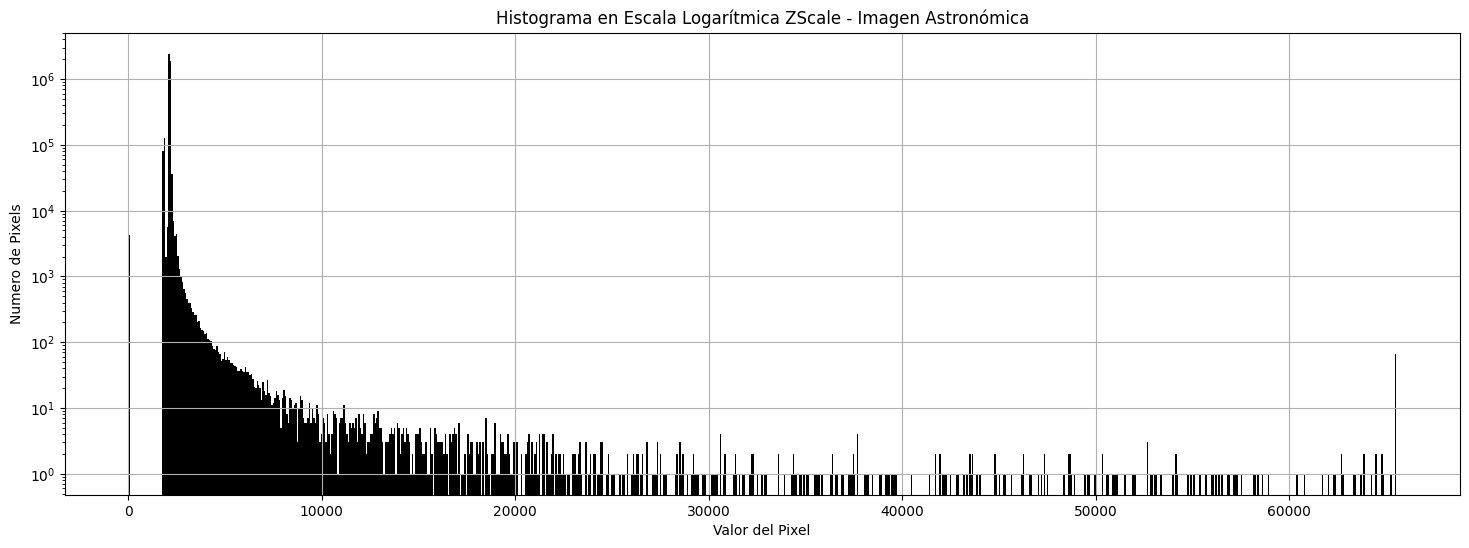

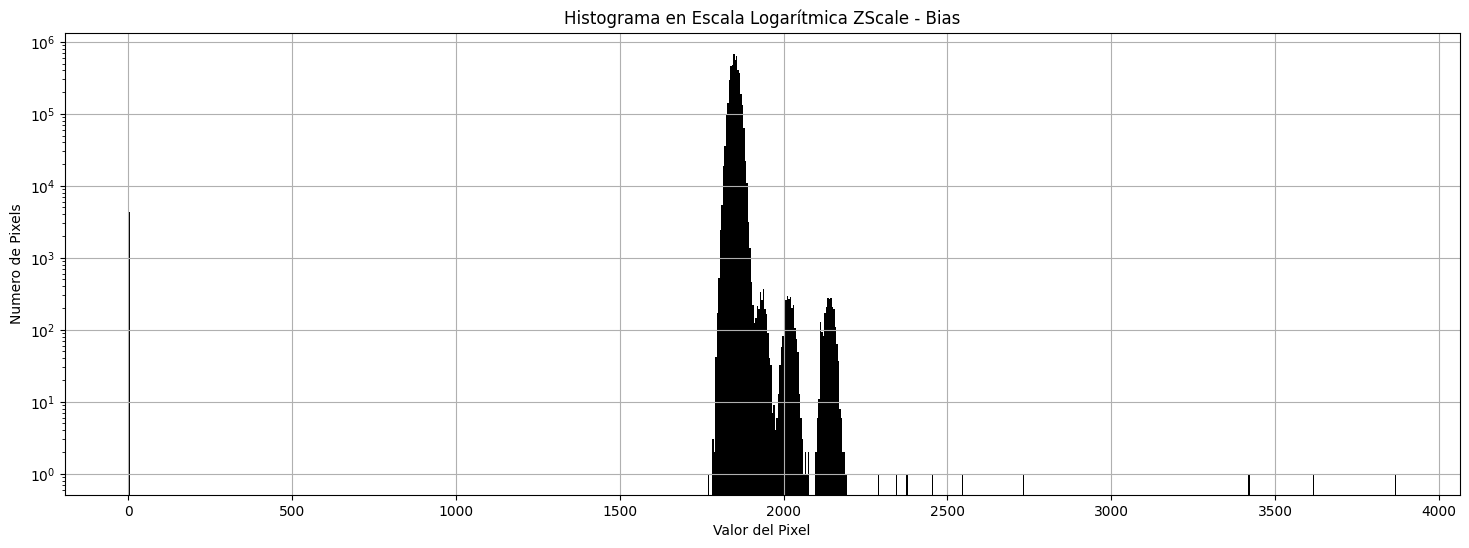

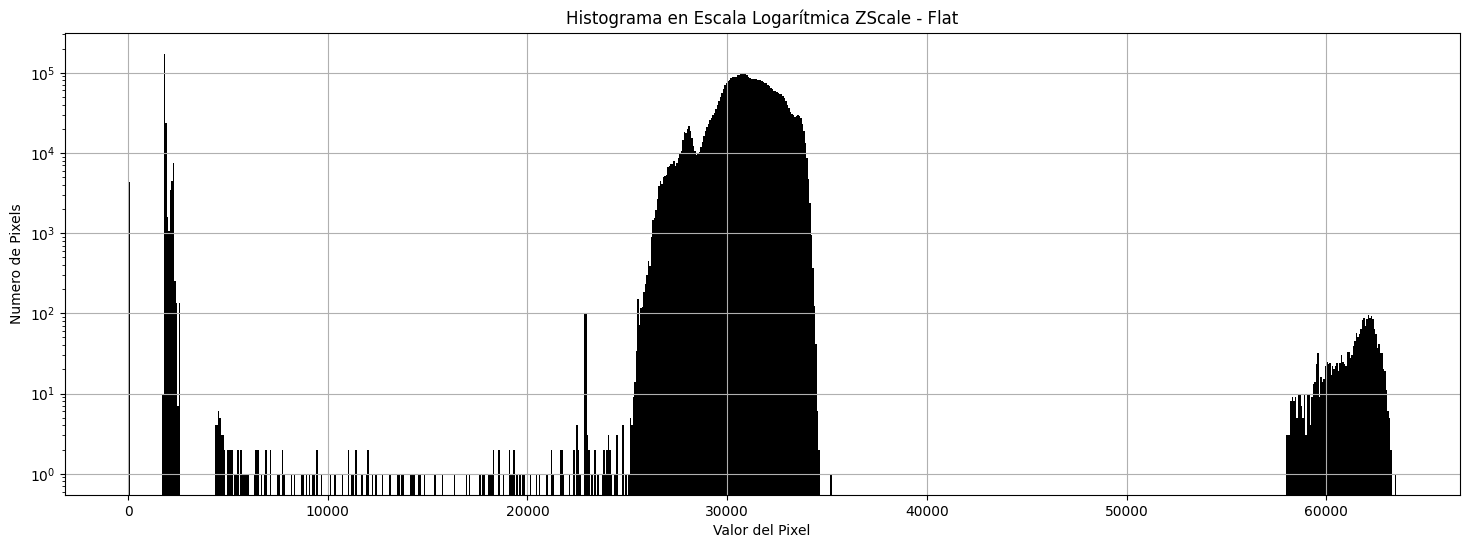

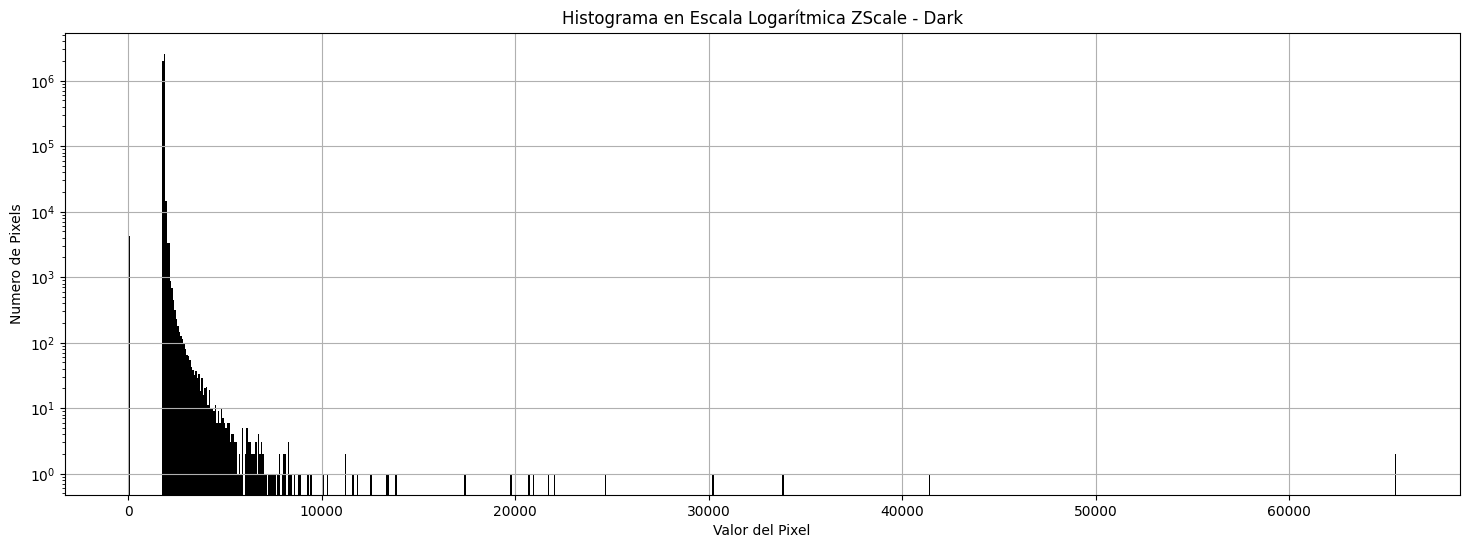

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from google.colab import drive

calibration_image_paths = [
    ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/bias01202024164210001.fit', 'Bias'),
    ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Flat_R-1s_01202024193232001.fit', 'Flat'),
    ('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Darks_120s_R_01202024165041001.fit', 'Dark')
]
astronomical_image_path = [('/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/1130_R_120s_01212024020627001.fit', 'Imagen Astronómica') , ()


# Función para cargar y mostrar el histograma en escala logarítmica zscale de una imagen
def mostrar_histograma(imagen_path, imagen_name):
    with fits.open(imagen_path) as hdul:
        data = hdul[0].data.flatten()

        # Calcular el histograma
        hist, bins = np.histogram(data, bins=np.linspace(np.min(data), np.max(data), 850))
        nonzero_hist = hist[hist > 0]  #Eliminar los valores iguales a cero para evitar log(0)

        # Graficar el histograma en escala logarítmica zscale
        plt.figure(figsize=(18, 6))
        plt.hist(data, bins=bins, color='black', log=True)  #Usar log=True para escala logarítmica zscale
        plt.title(f'Histograma en Escala Logarítmica ZScale - {imagen_name}')
        plt.xlabel('Valor del Pixel')
        plt.ylabel('Numero de Pixels')
        plt.grid(True)
        plt.show()

# Mostrar el histograma en escala logarítmica zscale para cada imagen
for imagen_path, imagen_name in [astronomical_image_path] + calibration_image_paths:
    mostrar_histograma(imagen_path, imagen_name)


# 6. ESTADISTICA DE CADA IMAGEN

In [ ]:
import numpy as np
from astropy.io import fits
from google.colab import drive

# Función para calcular el promedio, mediana y desviación estándar de una imagen FITS
def calcular_estadisticas(imagen_path):
    with fits.open(imagen_path) as hdul:
        data = hdul[0].data
        promedio = np.mean(data)
        mediana = np.median(data)
        desviacion_estandar = np.std(data)
    return promedio, mediana, desviacion_estandar

# Rutas de las imágenes FITS
ruta_dark = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Darks_120s_R_01202024165041001.fit'
ruta_bias = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/bias01202024164210001.fit'
ruta_flat = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/Flat_R-1s_01202024193232001.fit'
ruta_astronomica = '/content/drive/MyDrive/Practicas_CIDA/Practica1_fits/1130_R_120s_01212024020627001.fit'

# Calcular estadísticas para cada imagen
estadisticas_dark = calcular_estadisticas(ruta_dark)
estadisticas_bias = calcular_estadisticas(ruta_bias)
estadisticas_flat = calcular_estadisticas(ruta_flat)
estadisticas_astronomica = calcular_estadisticas(ruta_astronomica)

# Mostrar los resultados
print("Estadísticas de la imagen Dark:")
print("Promedio:", estadisticas_dark[0])
print("Mediana:", estadisticas_dark[1])
print("Desviación Estándar:", estadisticas_dark[2])
print()

print("Estadísticas de la imagen Bias:")
print("Promedio:", estadisticas_bias[0])
print("Mediana:", estadisticas_bias[1])
print("Desviación Estándar:", estadisticas_bias[2])
print()

print("Estadísticas de la imagen Flat:")
print("Promedio:", estadisticas_flat[0])
print("Mediana:", estadisticas_flat[1])
print("Desviación Estándar:", estadisticas_flat[2])
print()

print("Estadísticas de la imagen Astronómica:")
print("Promedio:", estadisticas_astronomica[0])
print("Mediana:", estadisticas_astronomica[1])
print("Desviación Estándar:", estadisticas_astronomica[2])


Estadísticas de la imagen Dark:
Promedio: 1855.6399076177065
Mediana: 1855.0
Desviación Estándar: 89.65890019790501

Estadísticas de la imagen Bias:
Promedio: 1849.6799743016816
Mediana: 1851.0
Desviación Estándar: 58.426940045688774

Estadísticas de la imagen Flat:
Promedio: 29641.238888259737
Mediana: 30944.0
Desviación Estándar: 6399.558827250661

Estadísticas de la imagen Astronómica:
Promedio: 2152.476347175015
Mediana: 2157.0
Desviación Estándar: 433.50538162556524


# 7. CALIBRACION DE LA IMAGEN ASTRONOMICA 1130

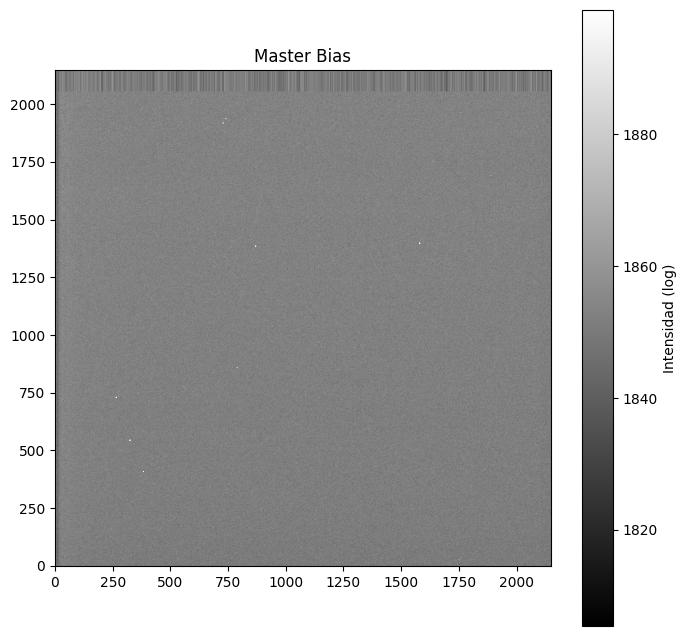

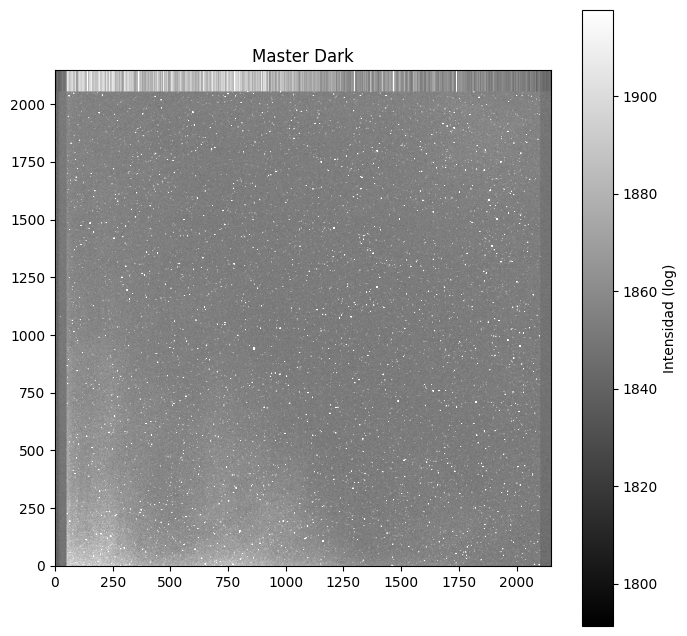

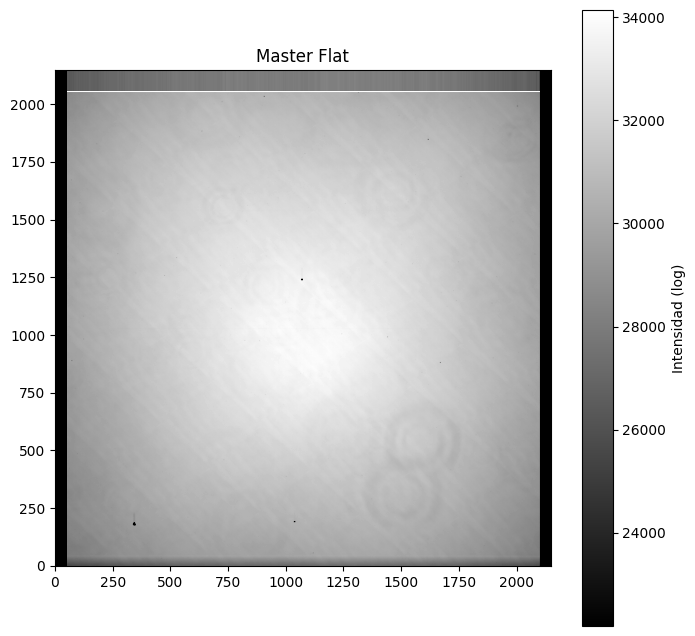

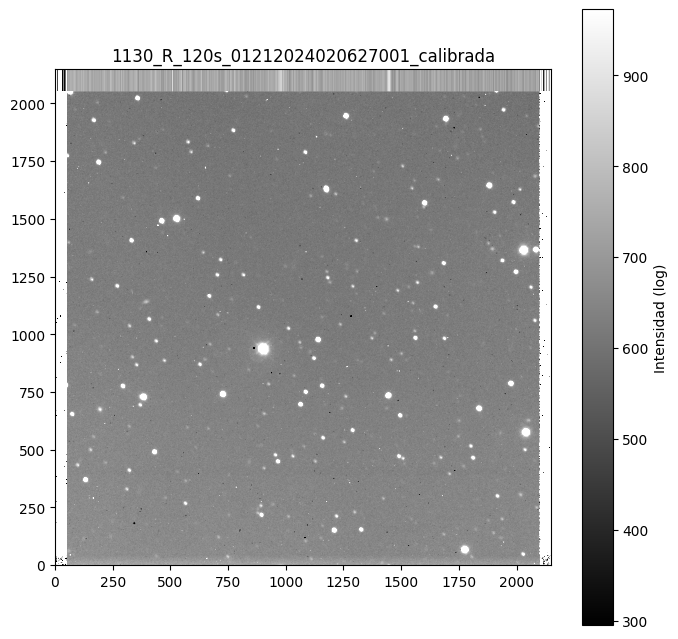

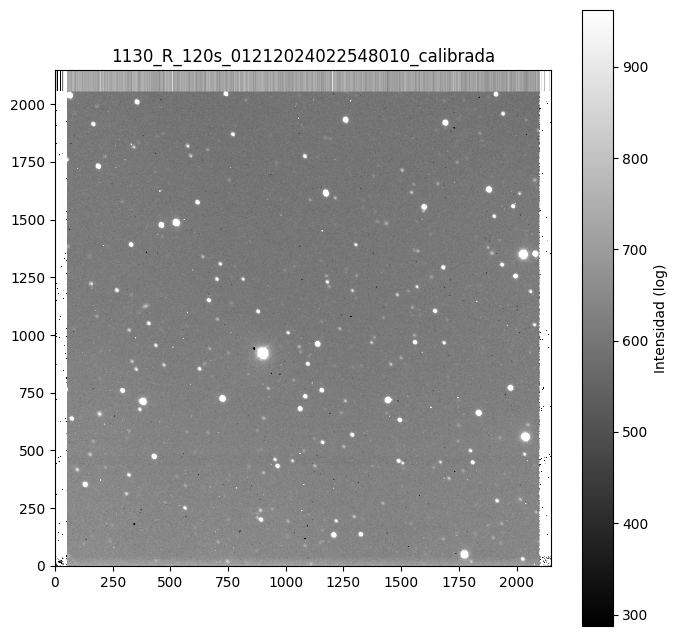

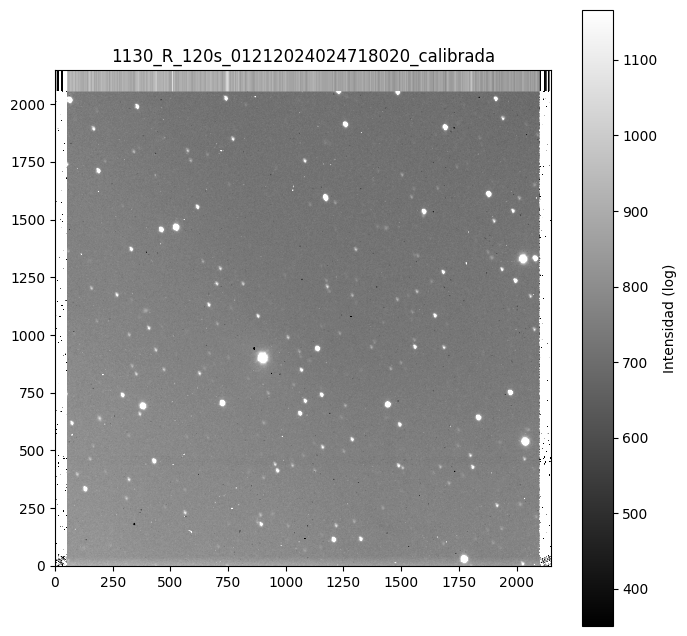


Estadísticas de la imagen sin corregir:
Media: 2204.8187883117257
Mediana: 2213.0
Desviación estándar: 350.9508817117216

Estadísticas de la imagen corregida:
Media: 1117.2212
Mediana: 754.7836
Desviación estándar: 7145.1006


In [ ]:
from google.colab import drive
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
import glob

# Ruta de la carpeta con los archivos FITS
folder_path = '/content/drive/MyDrive/Practicas_CIDA/Practica2_fits'

#CREACION DE LOS MASTERS -------------------------------------------------------------------------------------------------------
# Listas para almacenar los datos de cada tipo de imagen
bias_data = []
dark_data = []
flat_data = []

# Leer archivos FITS y clasificarlos
bias_files = glob.glob(os.path.join(folder_path, '*bias*.fit'))
dark_files = glob.glob(os.path.join(folder_path, '*Dark*.fit'))
flat_files = glob.glob(os.path.join(folder_path, '*Flat*.fit'))

# Leer y clasificar los archivos
for file_path in bias_files:
    with fits.open(file_path) as hdul:
        data = hdul[0].data.astype(np.float32)
        bias_data.append(data)

for file_path in dark_files:
    with fits.open(file_path) as hdul:
        data = hdul[0].data.astype(np.float32)
        dark_data.append(data)

for file_path in flat_files:
    with fits.open(file_path) as hdul:
        data = hdul[0].data.astype(np.float32)
        flat_data.append(data)

# Calcular los masters
master_bias = np.average(bias_data, axis=0)
master_dark = np.average(dark_data, axis=0)
master_flat = np.average(flat_data, axis=0)

# Función para mostrar una imagen en una escala logarítmica
def mostrar_imagen(data, title):
    zscale = ZScaleInterval()
    plt.figure(figsize=(8, 8))
    zmin, zmax = zscale.get_limits(data)
    plt.imshow(data, cmap='gray', origin='lower', vmin=zmin, vmax=zmax)
    plt.colorbar(label='Intensidad (log)')
    plt.title(title)
    plt.show()

# Visualizar cada imagen en escala logarítmica
mostrar_imagen(master_bias, "Master Bias")
mostrar_imagen(master_dark, "Master Dark")
mostrar_imagen(master_flat, "Master Flat")

# Guardar los masters como archivos FITS
bias_header = fits.getheader(bias_files[0]) if bias_files else None
dark_header = fits.getheader(dark_files[0]) if dark_files else None
flat_header = fits.getheader(flat_files[0]) if flat_files else None

fits.writeto('/content/drive/MyDrive/Practicas_CIDA/Resultados/master_bias1.fits', master_bias, header=bias_header, overwrite=True)
fits.writeto('/content/drive/MyDrive/Practicas_CIDA/Resultados/master_dark1.fits', master_dark, header=dark_header, overwrite=True)
fits.writeto('/content/drive/MyDrive/Practicas_CIDA/Resultados/master_flat1.fits', master_flat, header=flat_header, overwrite=True)


#CALIBRACION DE LA IMAGEN ASTRONOMICA-------------------------------------------------------------------------------------

folder_path = '/content/drive/MyDrive/Practicas_CIDA/Practica2_fits'

fits_files = [file for file in os.listdir(folder_path) if file.startswith('1130_R_120s_') and file.endswith('.fit')]

for fits_file in fits_files:
    # Ruta completa del archivo FITS
    astronomical_image_path = os.path.join(folder_path, fits_file)

    # Cargar los datos de los archivos FITS
    with fits.open(astronomical_image_path) as hdul:
        astronomical_image_data = hdul[0].data
        astronomical_image_header = hdul[0].header

    # Calcular la diferencia entre el master flat y el master bias
    difference = master_flat - master_bias

    # Calcular el valor mínimo y máximo de la diferencia
    min_difference = np.min(difference)
    max_difference = np.max(difference)

    # Normalizar la diferencia utilizando el valor mínimo y máximo
    normalized_difference = (difference - min_difference) / (max_difference - min_difference)
    epsilon = 1e-6

    # Aplicar la corrección de la imagen astronómica
    corrected_image_data = (astronomical_image_data - master_dark) / (normalized_difference + epsilon)

    # Guardar la imagen corregida como un nuevo archivo FITS manteniendo el header original
    output_path = os.path.join(folder_path, f'{fits_file.split(".")[0]}_calibrada.fits')
    fits.writeto(output_path, corrected_image_data.astype(np.float32), header=astronomical_image_header, overwrite=True)

    # Mostrar la imagen corregida
    mostrar_imagen(corrected_image_data, f"{fits_file.split('.')[0]}_calibrada")


#MOSTRAR LA ESTADISTICA COMPARATIVA DE LAS DOS IMAGENES -----------------------------------------------------------------------------------------------------
# Función para calcular la estadística básica de una imagen
def calcular_estadisticas(imagen):
    mean = np.mean(imagen)
    median = np.median(imagen)
    std_dev = np.std(imagen)
    return mean, median, std_dev

# Calcular estadísticas para ambas imágenes
mean_sin_corregir, median_sin_corregir, std_dev_sin_corregir = calcular_estadisticas(hdul[0].data)
mean_corregida, median_corregida, std_dev_corregida = calcular_estadisticas(corrected_image_data)

# Mostrar resultados
print()
print("Estadísticas de la imagen sin corregir:")
print("Media:", mean_sin_corregir)
print("Mediana:", median_sin_corregir)
print("Desviación estándar:", std_dev_sin_corregir)


print("\nEstadísticas de la imagen corregida:")
print("Media:", mean_corregida)
print("Mediana:", median_corregida)
print("Desviación estándar:", std_dev_corregida)


# 8. COMPARACION DEL PERFIL DE INTENSIDAD DE UN PUNTO ENTRE LA IMAGEN ASTRONOMICA CORREGIDA VS LA ORIGINAL

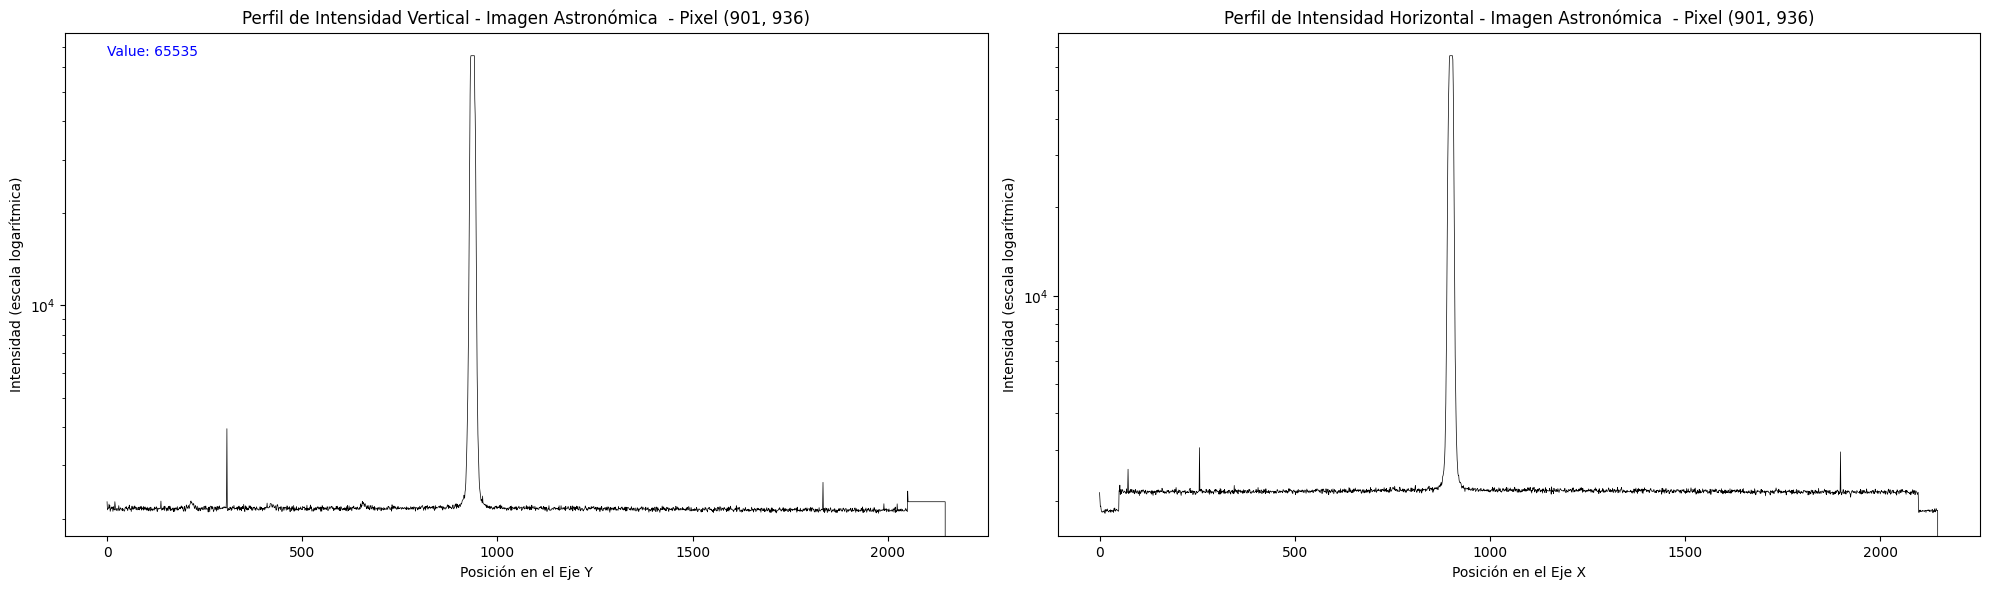

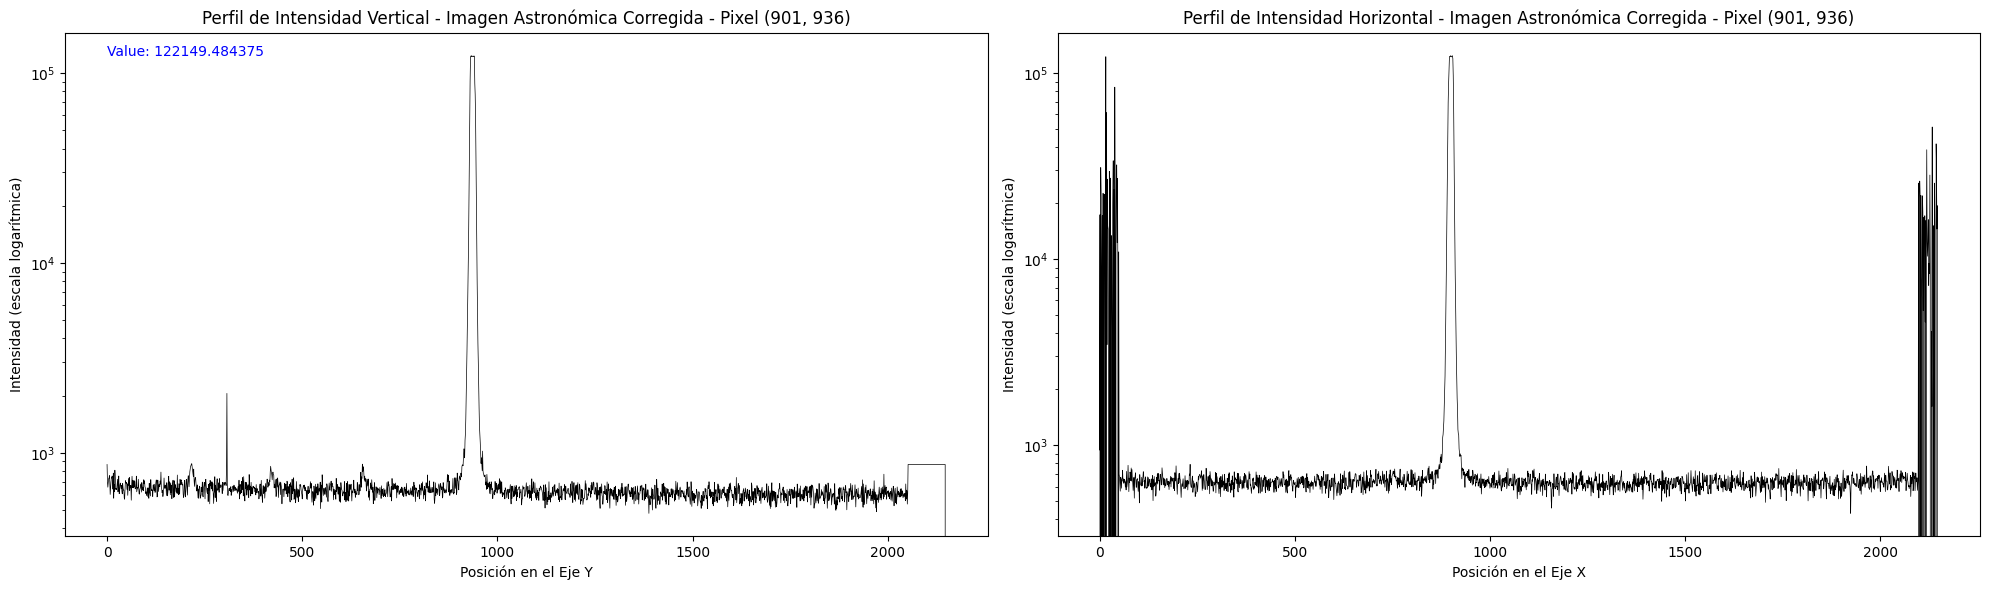

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval

# Función para calcular el perfil de intensidad en un píxel
def calcular_perfil_intensidad(imagen, x, y):
    with fits.open(imagen) as hdul:
        data = hdul[0].data
        intensidad = data[y, x]  # Coordenadas invertidas (y, x)
        perfil_vertical = data[:, x]  # Perfil vertical
        perfil_horizontal = data[y, :]  # Perfil horizontal
    return perfil_vertical, perfil_horizontal, intensidad

# Función para mostrar los perfiles de intensidad
def mostrar_perfil_intensidad(imagen_path, pixel, pixel_name, imagen_name):
    with fits.open(imagen_path) as hdul:
        data = hdul[0].data
        x, y = pixel  # Coordenadas del píxel especificado
        intensidad = data[y, x]  # Coordenadas invertidas (y, x)
        perfiles_x, perfiles_y, _ = calcular_perfil_intensidad(imagen_path, x, y)

        # Mostrar los resultados en gráficas separadas
        plt.figure(figsize=(20, 6))

        # Gráfico para el perfil de intensidad vertical
        plt.subplot(1, 2, 1)
        plt.semilogy(perfiles_x, color='black', linewidth=0.5)  # Ajusta el grosor de la línea
        plt.title(f'Perfil de Intensidad Vertical - {imagen_name} - {pixel_name}')
        plt.xlabel('Posición en el Eje Y')
        plt.ylabel('Intensidad (escala logarítmica)')
        plt.text(0, np.max(perfiles_x), f'Value: {intensidad}', color='blue')

        # Gráfico para el perfil de intensidad horizontal
        plt.subplot(1, 2, 2)
        plt.semilogy(perfiles_y, color='black', linewidth=0.5)  # Ajusta el grosor de la línea
        plt.title(f'Perfil de Intensidad Horizontal - {imagen_name} - {pixel_name}')
        plt.xlabel('Posición en el Eje X')
        plt.ylabel('Intensidad (escala logarítmica)')

        plt.tight_layout()
        plt.show()

# Rutas de las imágenes FITS astronómicas
astronomical_image_paths = [
    ('/content/drive/MyDrive/Practicas_CIDA/Practica2_fits/1130_R_120s_01212024020627001.fit', 'Imagen Astronómica '),
    ('/content/drive/MyDrive/Practicas_CIDA/Resultados/1130_001_calibrada_F1.fits', 'Imagen Astronómica Corregida')
]

# Coordenadas del píxel para evaluar
pixel = (901, 936)

# Mostrar los perfiles de intensidad para cada imagen astronómica y el píxel especificado
for imagen_path, imagen_name in astronomical_image_paths:
    mostrar_perfil_intensidad(imagen_path, pixel, 'Pixel (901, 936)', imagen_name)


# 9. COMPARACION DEL VALOR DEL PIXEL EN EL MISMO PUNTO EN LAS DOS IMAGENES

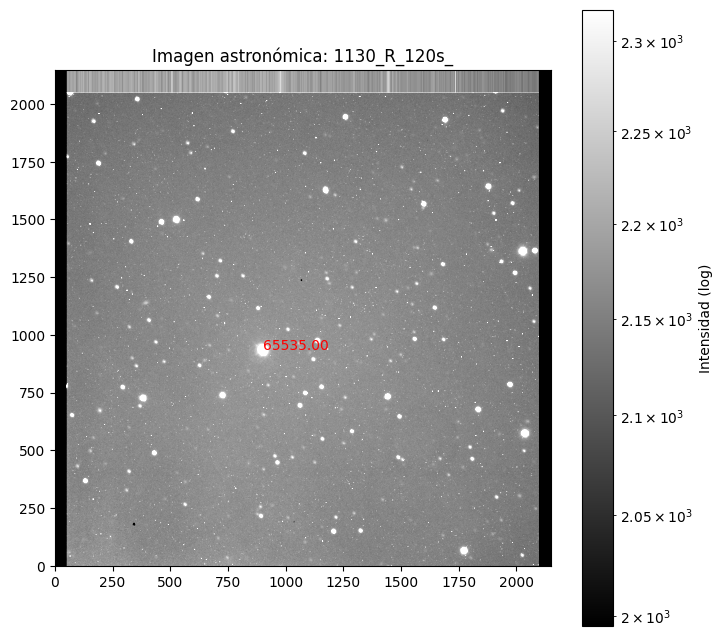

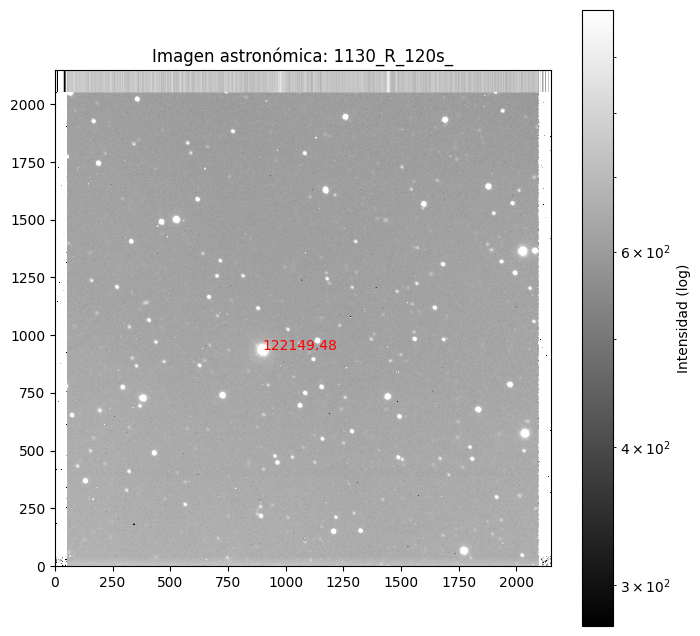

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from matplotlib.colors import LogNorm

# Rutas de las imágenes astronómicas
astronomical_image_paths = ['/content/drive/MyDrive/Practicas_CIDA/Practica2_fits/1130_R_120s_01212024020627001.fit','/content/drive/MyDrive/Practicas_CIDA/Resultados/1130_001_calibrada_F1.fits']

# Coordenadas del píxel para mostrar el valor (x, y)
pixel = (901, 936)  # Píxel central

# Función para procesar y mostrar una imagen FITS
def mostrar_imagen(path):
    with fits.open(path) as hdul:
        data = hdul[0].data
        header = hdul[0].header

        # Configura la escala logarítmica ZScale
        zscale = ZScaleInterval()
        zmin, zmax = zscale.get_limits(data)

        # Visualización con escala logarítmica
        plt.figure(figsize=(8, 8))
        plt.imshow(data, cmap='gray', norm=LogNorm(vmin=zmin, vmax=zmax), origin='lower')
        plt.colorbar(label='Intensidad (log)')

        # Muestra el valor del píxel
        valor_pixel = data[pixel[1], pixel[0]]  # Coordenadas invertidas (y, x)
        plt.text(pixel[0], pixel[1], f"{valor_pixel:.2f}", color='red')  # Muestra el valor del píxel

        # Ajusta los límites del eje
        plt.xlim(0, data.shape[1])
        plt.ylim(0, data.shape[0])

        plt.title(f"Imagen astronómica: {header.get('OBJECT')}")
        plt.show()

# Muestra las imágenes astronómicas
for path in astronomical_image_paths:
    mostrar_imagen(path)


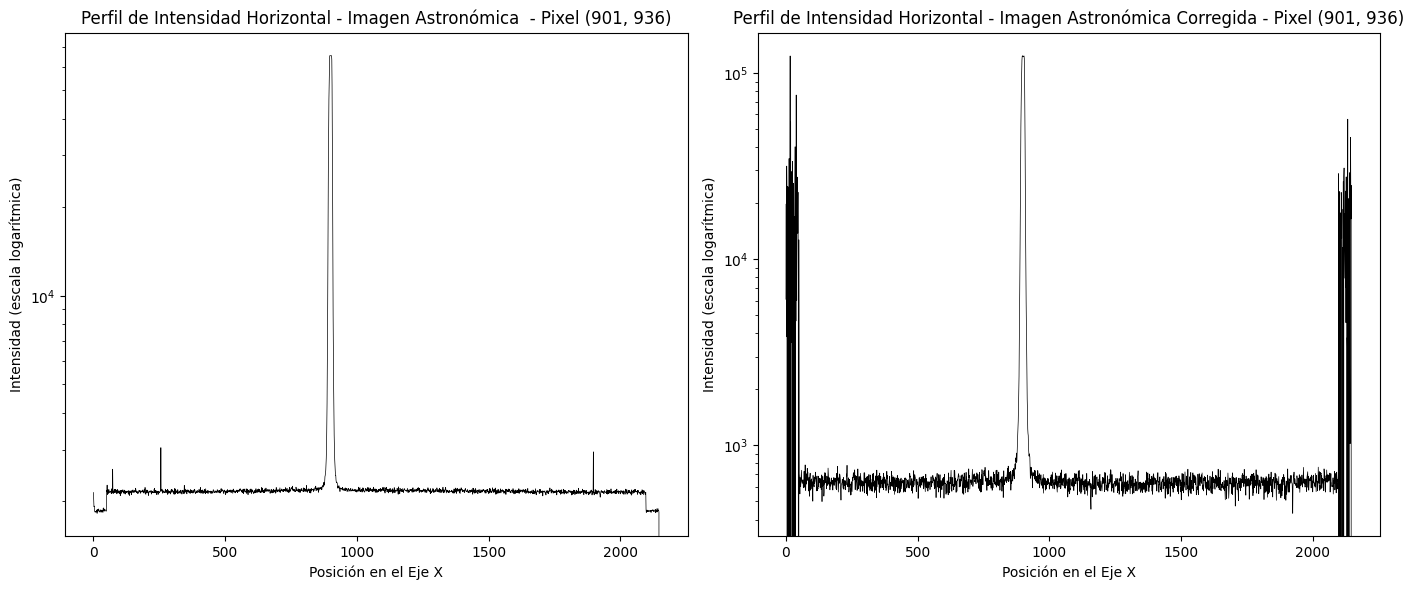

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Función para calcular el perfil de intensidad horizontal en un píxel
def calcular_perfil_intensidad(imagen, x, y):
    with fits.open(imagen) as hdul:
        data = hdul[0].data
        perfil_horizontal = data[y, :]  # Perfil horizontal
    return perfil_horizontal

# Función para mostrar el perfil de intensidad horizontal
def mostrar_perfil_intensidad(imagen_path, pixel, pixel_name, imagen_name, ax):
    perfil_horizontal = calcular_perfil_intensidad(imagen_path, *pixel)

    # Mostrar el perfil de intensidad horizontal
    ax.semilogy(perfil_horizontal, color='black', linewidth=0.5)  # Ajusta el grosor de la línea
    ax.set_title(f'Perfil de Intensidad Horizontal - {imagen_name} - {pixel_name}')
    ax.set_xlabel('Posición en el Eje X')
    ax.set_ylabel('Intensidad (escala logarítmica)')

# Rutas de las imágenes FITS astronómicas
astronomical_image_paths = [
    ('/content/drive/MyDrive/Practicas_CIDA/Practica2_fits/1130_R_120s_01212024020627001.fit', 'Imagen Astronómica '),
    ('/content/drive/MyDrive/Practicas_CIDA/Resultados/1130_001_calibrada_F1.fits', 'Imagen Astronómica Corregida')
]

# Coordenadas del píxel para evaluar
pixel = (901, 936)

# Crear los subplots con el diseño deseado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Mostrar los perfiles de intensidad horizontal para cada imagen astronómica y el píxel especificado
for (imagen_path, imagen_name), ax in zip(astronomical_image_paths, axs):
    mostrar_perfil_intensidad(imagen_path, pixel, 'Pixel (901, 936)', imagen_name, ax)

plt.tight_layout()
plt.show()
